#  Data Analysis Project: Analyzing climate statistics
### Python for Beginners Workshop at University of Waterloo, Jan 2016
author: Ivana Kajić 


## Introduction

This project is a continuation of the lecture [Python Workshop for Beginners: Data Analysis](http://uwpyb.github.io/materials/lectures/day_2.slides). 
In this project we will:

1. Load the temperature data into the memory of our computer

2. Analyze the data

3. Making nice plots that allow us to answer some questions about the data

4. For those who want more: Analysis 2: Comparing temperatures in different countries


The exercises are meant to be done at your own individual pace. We want to encourage you to experiment with the code and try out different things. Trying out things also means breaking them! So, don't be afraid to break pieces of code and get errors. If you don't understand something or want to know more about some part of the code, don't hesitate to ask a mentor for an explanation. Sometimes, there are many different ways to do the same thing!

After the end of each part you will find a link to a script containing all the code used in that part of the exercise.

## Workflow

Create a script **climate.py** in your **workshop** folder on your Desktop. Write your code there and every time you add new lines run the script in the IPython console:
```
run climate.py
```
Make sure that you are running your commands in IPython from the directory where your file is located, otherwise IPython will not be able to find that file. To go to the directory where the file is located type following lines in IPython:
```
cd
cd Desktop
cd workshop
```

## Data

We will be accessing the temperature data provided by the [World Bank’s Climate Change Knowledge Portal](http://data.worldbank.org/topic/climate-change). The portal provides historical precipitation and temperature data for a period of time starting from 1901 to 2009 for every country in the world. 

We will use yearly averages for Canada for this period which can be downloaded here:

Temperature: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv

Go to the website, right click (**Save page as** or **Save as**) and save that file in the **workshop** folder. After you have downloaded the file, go to that folder and open the file in your editor (e.g. Sublime Text or Notepad) to take a look at it.

The first few lines should look something like this:
```
year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.155729293823242
1905,-7.547311305999756

```

## 2. Converting the data into a NumPy array 

For this exercise we will use the NumPy package. Import the package by typing the following line in your **climate.py** script:

In [1]:
import numpy as np

We can use NumPy to load the data we have downloaded. In the lecture, we have done this
```python
chocolate = np.loadtxt('chocolate.csv', delimiter=',', skiprows=1)
```
Where `chocloate.csv` was a file stored on our computer (reminder: `delimiter=1` told NumPy that the data in the file is separated by commas). 

Now, let's load the temperature data as an array of numbers.

In [37]:
temperatures = np.loadtxt('CAN.csv', delimiter=',', skiprows=1)

Notice we have added and additional parameter `skiprows=1`. This is because the first row of our data does not contain numbers, but only text:

`year,data`

By specifying that parameter, we tell numpy to skip this line. Now, we have loaded our array, let's take a look at it:

In [38]:
print(temperatures)

[[ 1901.            -7.67241907]
 [ 1902.            -7.86271143]
 [ 1903.            -7.91078281]
 [ 1904.            -8.15572929]
 [ 1905.            -7.54731131]
 [ 1906.            -7.68410349]
 [ 1907.            -8.41355324]
 [ 1908.            -7.79092932]
 [ 1909.            -8.2393055 ]
 [ 1910.            -7.77461147]
 [ 1911.            -8.11444664]
 [ 1912.            -7.88540268]
 [ 1913.            -7.98794031]
 [ 1914.            -7.96593761]
 [ 1915.            -7.14403915]
 [ 1916.            -8.13297844]
 [ 1917.            -8.49991417]
 [ 1918.            -8.20466232]
 [ 1919.            -8.03598595]
 [ 1920.            -7.83067989]
 [ 1921.            -7.68577719]
 [ 1922.            -8.33498955]
 [ 1923.            -8.02212524]
 [ 1924.            -7.57456827]
 [ 1925.            -7.95162582]
 [ 1926.            -7.79278946]
 [ 1927.            -7.96172714]
 [ 1928.            -7.23797512]
 [ 1929.            -8.1236515 ]
 [ 1930.            -7.3023057 ]
 [ 1931.  

Seems like a lot of numbers! To find out how many rows there are, we can look at the shape of that array:

In [39]:
print(temperatures.shape)

(112, 2)


The output of `temperatures.shape` gives us two numbers, the first one is the number of rows and the second one is the number of columns in the array. Seems like we have yearly averages for 111 years for Canada, that's a lot of data! You might be asking yourself why 111 years and not 112 like it's written in the output. If you look carefully at the rows we have printed just a few lines above, you will see that the first row does not contain any years but the text with column labels `year,data`. 

Also, you have might noticed the round brackets `()` we have not seen before. We have seen square brackets for lists `[]` and curly brackets for dictionaries `{}`. The round brackets stand for tuple data type, which is very similar to a list:

In [40]:
print(type(temperatures.shape))

<class 'tuple'>


We can use square brackets [] to access its elements (like for lists):

In [41]:
print("Number of rows in temperatures:", temperatures.shape[0])

Number of rows in temperatures: 112


Let's take a look at the first row:

In [42]:
print("The first row", temperatures[0])

The first row [ 1901.            -7.67241907]


To get the year in the first row we can specify the first column:

In [43]:
print("The first year:", temperatures[0, 0])

The first year: 1901.0


**Exercise**: How would you get the temperature for the year 1901?

We can also get all the years at once. For that we need to tell NumPy to give us all the rows in the first column. This can be done in the following way:

In [44]:
print("All years:", temperatures[0:, 0])

All years: [ 1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.  1910.
  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.  1920.
  1921.  1922.  1923.  1924.  1925.  1926.  1927.  1928.  1929.  1930.
  1931.  1932.  1933.  1934.  1935.  1936.  1937.  1938.  1939.  1940.
  1941.  1942.  1943.  1944.  1945.  1946.  1947.  1948.  1949.  1950.
  1951.  1952.  1953.  1954.  1955.  1956.  1957.  1958.  1959.  1960.
  1961.  1962.  1963.  1964.  1965.  1966.  1967.  1968.  1969.  1970.
  1971.  1972.  1973.  1974.  1975.  1976.  1977.  1978.  1979.  1980.
  1981.  1982.  1983.  1984.  1985.  1986.  1987.  1988.  1989.  1990.
  1991.  1992.  1993.  1994.  1995.  1996.  1997.  1998.  1999.  2000.
  2001.  2002.  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.
  2011.  2012.]


The first zero with a colon **0:** means "give me everything starting from the first row". This is convenient because we do not need to know how many rows there are, we can just write **:** and NumPy will understand that "from zero till the end.". We can also specify a different end and get just the first five years:

In [45]:
print(temperatures[0:5, 0])

[ 1901.  1902.  1903.  1904.  1905.]


And this is the same as:

In [46]:
print(temperatures[:5, 0])

[ 1901.  1902.  1903.  1904.  1905.]


So, we see that when we don't put any number in front of **:** the Python will understand this as "everything starting from zero". If we don't put anything after the colon, it will understand "everything until the end".

### Moving around in NumPy arrays

**Exercise 1**: How would you get the all the temperatures?

**Exercise 2**: How would you get last five years? (Hint: use negative indexing)

**Exercise 3**: How would you get the temperature in the last row?


# 2. Data analysis

Let's take a closer look at our data. One interesting thing we might want to look at is the maximal temperature in the period from 1901-2009. 

A very simple thing to do would be to call `np.max` on our temperatures:

In [47]:
print(np.max(temperatures))

2012.0


Uh, but if 2012 was the maximal temperature there would be no us now! 2012 is the maximal number in our whole data set, and we need a way to tell NumPy to look for the maximal values of temperatures only (and not years!). Since our temperatures are stored in the second column we can get the maximum and the minimum by acessing that column only:

In [48]:
max_temp = np.max(temperatures[:, 1])
min_temp = np.min(temperatures[:, 1])

In [49]:
print("Lowest average temperature in Canada over last 111 years was:", min_temp)
print("Highest average temperature in Canada over last 111 years was:", max_temp)

Lowest average temperature in Canada over last 111 years was: -9.52518749237
Highest average temperature in Canada over last 111 years was: -4.70364952087


It would be useful to find out when these maximal and minimal temperatures happened! 
To do this, we could again  print the temperatures on the screen and find these values in the second column and take a look at the year in the first column. But this could take a long time since we might end up inspecting average temperatures for more than 100 years. More efficient way to do the same task is to use `np.where`:

In [50]:
min_year = np.where(temperatures[:, 1] == min_temp)

What np.where does is it takes the array (temperatures[:, 1]) and looks at where in that array the value corresponds to the value we have provided (min_temp). In another words, this line asks numpy to tell us the row number of the minimal temperature. Let's take a look at the output of one of them:

In [51]:
print(min_year)

(array([71]),)


Ok, so we see a number there which looks like it could be the row index, but it's wrapped in all sorts of symbols: there are parentheses `()` and the `array()`. Let's try to understand what this means: the outermost parentheses stand for a tuple, whose elements can be accessed like the elements of a list. So let's get its first element:

In [52]:
min_year_index = min_year[0]
print(min_year_index)

[71]


But the `[]` brackets in the output say we got a list (or a numpy array, check yourself!), so again we need to access the first element:

In [53]:
min_year_index = min_year_index[0]
print(min_year_index)

71


Finally we have the index of a row which contains the year with the lowest temperature:

**Exercise**: Instead of getting the index in two lines:
```
min_year_index = min_year[0]
min_year_index = min_year_index[0]
```
how would you get the same index in just one line? Why doesn't this work:
```
min_year_index = min_year_index[0,0]
```

**Exercise 1**: Get the row containing the year with the highest average temperatures!

**Exercise 2**: Get the average temperature for the whole period! (Hint: np.mean())

Now we know how to get bits and pieces from an array of numbers. To better see what happened with the temperature over the years, it's better to visualize the data. So let's see what happened in the last 100 years!

The script containing all the statements we have written until now are found in `climate.py`. You can access that script at: https://github.com/uwpyb/materials/tree/master/projects.

# 3. Plotting the data

Plotting the data will allow us to see any trends in the temperature change over years. Did the average temperature decrease or increase, or maybe stayed the same? 

For plotting we are again going to use the `matplotlib` library, like we have done in the lecture.
First, let's create a script called `temperature_plots.py` and import the necessary tools:

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# do not include this line in your code
%matplotlib inline

Let's make a simple plot of temperature averages over all 111 years, remember to put your years on the x-axis (first parameter) and temperature values (second parameter) on the y-axis:

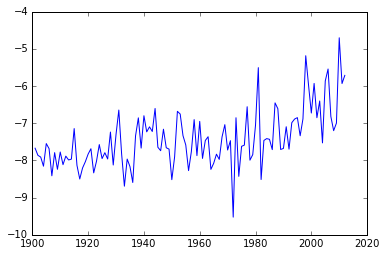

In [56]:
plt.figure()
plt.plot(temperatures[:, 0], temperatures[:, 1])
plt.show()

There are certain things we can do to make this plot look more informative. First, let's put labels and the title:

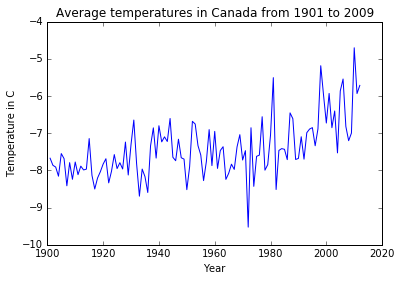

In [57]:
plt.figure()
plt.plot(temperatures[:, 0], temperatures[:, 1])
plt.title("Average temperatures in Canada from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.show()

We can also get rid of the white space on the right by specifying the limits for our x-axis. This limit will say which years we want to plot. Remember that our x-axis represents years, so we can use `set_xlim` to show the data between 1901 and 2009:

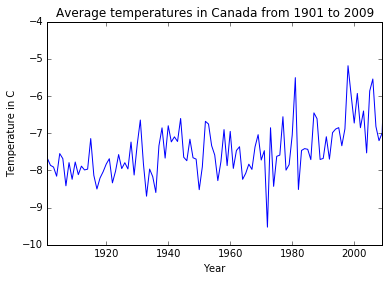

In [58]:
plt.figure()
plt.plot(temperatures[:, 0], temperatures[:, 1])
plt.title("Average temperatures in Canada from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2009])
plt.show()

**Exercise**: Function `plot` lets you pick a color and the linewidth by specifying parameters `color` and `linewidth`. Pick a color and change the default linewidth to see what happens. Choose among following colors: blue, green, red, cyan, magenta, yellow, black, white (e.g. `color='cyan'`). If you want more colors, try looking up on Google what are other fancy options!

**Question**: Looking a this plot: how would you describe what happened with the average temperature over the last 10, 50  and 100 years?


# 4. Analysis 2: Comparing temperatures in different countries

We have seen how to do a simple plot using the data we have downloaded. Now, let's load temperature data from different countries and compare them.  In the examples below we will be using 'HRV' which stands for Hrvatska (Croatia) and is very difficult to pronounce if you don't speak a Slavic language, and 'DEU' for Deutschland (Germany). Visit [this page](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) to find the three-letter country code of another country you can use in your own script. 

You can download the temperatures for Croatia here:

`http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/HRV.csv`


And for Germany here:

`http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/DEU.csv`

Again, you go to these websites and save the data in your `workshop` folder by right-clicking on the website and selecting "Save Page as".

To open the files use numpy as before:

In [24]:
temperatures_deu = np.loadtxt('DEU.csv', delimiter=',', skiprows=1)
temperatures_hrv = np.loadtxt('HRV.csv', delimiter=',', skiprows=1)

Let's plot both temperatures on one plot:

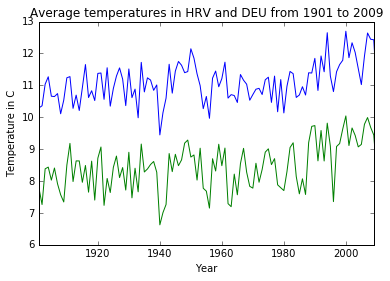

In [25]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1])
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1])
plt.title("Average temperatures in HRV and DEU from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2009])
plt.show()

Let's make this plot a bit easier to read by labelling the lines. For that we can pass the argument `label` to the function `plot` and then display a legend. By passing a parameter `loc` (for location), we can tell matplotlib to put the legend in what it estimates to be a best region of the plot:

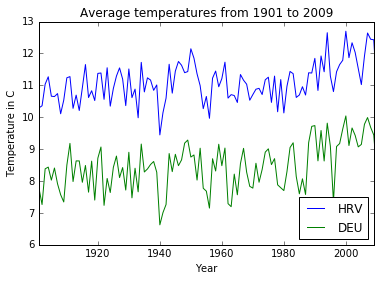

In [26]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV')
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU')
plt.title("Average temperatures from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2009])
plt.legend(loc='best')
plt.show()

**Question**: If you don't specify `loc` and just use `plt.legend()` where does matplotlib put the legend?

Let's do a few chages to our plot to make it look more interesting. Change both linewidths to `2` and chage their colors to red for Croatia and blue for Germany. Also, we can easily turn the grid on `plt.grid('on')` to compare the values more easily.

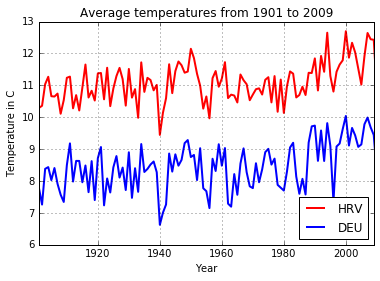

In [27]:
plt.figure()
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV', color='r', linewidth=2)
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU', color='b', linewidth=2)
plt.title("Average temperatures from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2009])

plt.legend(loc='best')
plt.grid('on')
plt.show()

Finally, we can resize our plot by expanding it in horizontal direction `figsize=(10, 4)`:

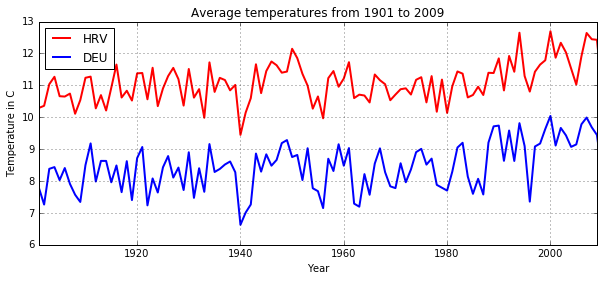

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(temperatures_hrv[:, 0], temperatures_hrv[:, 1], label='HRV', color='r', linewidth=2)
plt.plot(temperatures_deu[:, 0], temperatures_deu[:, 1], label='DEU', color='b', linewidth=2)
plt.title("Average temperatures from 1901 to 2009")
plt.xlabel("Year")
plt.ylabel("Temperature in C")
plt.xlim([1901, 2009])

plt.legend(loc='best')
plt.grid('on')
plt.show()

**Question  1**: From this plot, can you guess which country is placed more in the south and which one in the north? Check your guess by taking a look at a map of Europe.

**Question  2**: Is there anything odd about this plot? 

Seems like there is a dip in minimal temperature for both countries in 1940. A quick search in the Internet reveals that this was a weather anomaly, where all European countries experienced abnormally cold winters.

To save your figure, you can use `plt.savefig` function:

In [29]:
plt.savefig('temperatures_hrv_deu.pdf')

To save in another format (e.g. png, jpg) just replace **.pdf** with the desired extension.

Congratulations, you have completed the project! Feel free to explore more plotting examples in the [matplotlib gallery](http://matplotlib.org/gallery.html) and analyse more data. More exercises are below:

The code for plotting we have used here is available in `plotting_temperatures.py` at:
https://github.com/uwpyb/materials/tree/master/projects

# Additional exercises:

1. Saving results
---
In this exercise we will see how to use `np.savetxt` to save the data. For a country of your choice extract the lowest, highest and the average temperature (including the year when those occurred). Create two lists, one containing the text (e.g. `text=['Lowest temp', 'Highest temp', 'Average']`) and another containing the values (`values`). Make sure the lists have the same length and use `np.column_stack` to stack the lists together: 
```python
table = np.column_stack((text, values))
print(table)
```
To save this into a file in the current directory use:
```python
np.savetxt('stats.txt', table, fmt="%s")
```
`np.savetxt` expect the file name as the first argument and the data as the second. `fmt` stands for format and indicates that we want to store strings (`%s`). After you have saved the file, open it in the editor to check what's inside!

2. More plotting
---
Pick a couple of [country codes](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) from countries you have never heard of before and make their temperature plots (like we did for Canada). For that, you need to download the data by changing the country code in this link:
```
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```
Use a different color for every country, and make sure to include a legend so you can see which line represents which country. Can you try to guess their relative positions to each other on the Earth by looking at the plot?

4. Getting the data from the Internet (big and fun exercise!)
---
Instead of manually downloading the data sets, we can fetch them directly from the Internet in our Python code! This is a very common practice in programming and is possible because the source of our data (in our case the World's Bank website) provides information on how to access their data. This is called Application Programming Interface (API). 

Let's write a Python script that fetches historical temperature values for Canada. For that, we will need another new library called `requests`, which knows how to deal with the content of a website. For this part of the exercise, create a new script called **climate_internet.py** and import the requests package (and numpy which we are going to use later):

In [30]:
import requests
import numpy as np

The following line will fetch the temperatures for Canada:

In [31]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv"
print("Getting the data from:", url)
resp = requests.get(url)

Getting the data from: http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv


What happened here? URL, also known as the link, is the text you usually write in your address bar in your browser to go to a certain website. For example, `https://www.google.ca/` is a valid URL and so is `https://www.youtube.com/watch?v=2XID_W4neJo`. Notice how the link to the youtube video is specified by a sequence of characters `2XID_W4neJo` after the equals sign `=` in the link (another video would have a different sequence of characters). 

Similarly, the link to our data set contains two pieces of information (tas and CAN) in the URL that specify:
`https://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv`

- tas: we want temperatures (for precipitation this would be `pr`)
- CAN: for Canada

To see the data we are downloading, open your web-browser and copy and paste the link stored in `url`. You can also get the data for other countries by replacing CAN with other country codes (e.g. DEU for Germany or GBR for the United Kingdom.)

Then, in the next line:
```python
resp = requests.get(url)
```
we have used function `get` from `requests` and gave it the link as a parameter. This function knows how to get the website content when we give it a URL. If everything went well, the function will store the data in the variable `resp`. There is a simple way to check if everything went well:

In [32]:
print("Response from the website (200 is OK):", resp.status_code)

Response from the website (200 is OK): 200


Status codes are messages exchanged among computers on the Web. Sometimes when you try to open a website in your browser you might get a message: `404 Page not found`. The 404 number is a status code meant to tell your web-browser "Hey, you requested something I don't have... here's a 404 for you". Here, we are all good  because 200 means "OK".

To access the data we have received from the website, we can look into the variable `resp.text`. Let's make sure that this is indeed text:

In [33]:
print("Type of the data we received:", type(resp.text))

Type of the data we received: <class 'str'>


Let's print first 100 characters to peek into the content:

In [34]:
print(resp.text[:100])

year,data
1901,-7.67241907119751
1902,-7.862711429595947
1903,-7.910782814025879
1904,-8.15572929382


If you are still skeptical (and in programming it's good to be skeptical!), there is an easy way to check that what we have have seen on the website is indeed what we have on our computer now. Go to the website:

```
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```

and compare the first few lines there and the first few lines in your code. Convinced now? Good! You can now use the `np.loadtxt` as before to load this data into a numpy array.

Now, instead of telling numpy to read a file stored on our computer, we will give it the text stored in the variable `resp.text`. There is a little catch to keep in mind here: we need to tell NumPy where new lines are in the text. To do this, we can split the text in `resp.text` into chunks where each chunk is a new row. In programming a new line is written as `\n`:

In [35]:
rows = resp.text.split('\n')
rows[:5]

['year,data',
 '1901,-7.67241907119751',
 '1902,-7.862711429595947',
 '1903,-7.910782814025879',
 '1904,-8.155729293823242']

Compare these numbers with the numbers from before. We should recognize that they are the same! The only difference is how we organized the data: now, we have a list where every element is a row from our `resp.text` and before we had one large string. `np.loadtxt` will now know how to read this and store it into an array:

In [36]:
temperatures = np.loadtxt(rows, delimiter=',', skiprows=1)

4. 1. Creating functions
---
Write a function which takes a [three-letter country code](http://unstats.un.org/unsd/tradekb/Knowledgebase/Country-Code) as input and returns a variable containing the csv data that can be loaded using `numpy.loadtxt`. Rewrite your code to use this function every time the temperature data is requested.

4. 2. Re-plot
---
Rewrite your code for Exercise 2 "More plotting" to use functions to download the files from the internet!

4. 3. Function for precipitation data
---
Write a new function that returns the precipitation data! For that you will need to change **tas** in the following url to **pr**:

```
https://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/CAN.csv
```